## Deep Neural Network for MNIST Dataset

**Importing Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
import tensorflow.keras as keras
import os
import time
from warnings import filterwarnings
filterwarnings("ignore")

2021-11-11 12:20:06.740525: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2021-11-11 12:20:06.740549: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


#### Loading MNIST dataset from keras

In [2]:
mnist = keras.datasets.mnist.load_data()

In [3]:
(train_x_all, train_y), (test_x_all, test_y) = mnist
print(f'Shape of training data = {train_x_all.shape}')
print(f'Shape of testing data = {test_x_all.shape}')

Shape of training data = (60000, 28, 28)
Shape of testing data = (10000, 28, 28)


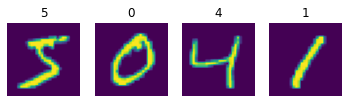

In [4]:
fig, ax =  plt.subplots(1, 4)
for i in range(4):
    ax[i].imshow(train_x_all[i])
    ax[i].set_title(train_y[i])
    ax[i].axis('off')
    

In [5]:
train_x = train_x_all/255.0
test_x =  test_x_all/255.0

In [6]:
model = keras.Sequential(name='mnist')
model.add(keras.layers.Flatten(input_shape=[28, 28], name='Input'))
model.add(keras.layers.Dense(32, activation='relu'))
model.add(keras.layers.Dense(10, activation = keras.activations.softmax, name="Output"))
model.summary()

Model: "mnist"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Input (Flatten)              (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 32)                25120     
_________________________________________________________________
Output (Dense)               (None, 10)                330       
Total params: 25,450
Trainable params: 25,450
Non-trainable params: 0
_________________________________________________________________


2021-11-11 12:20:08.003564: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2021-11-11 12:20:08.003606: W tensorflow/stream_executor/cuda/cuda_driver.cc:326] failed call to cuInit: UNKNOWN ERROR (303)
2021-11-11 12:20:08.003625: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (ajay-pc): /proc/driver/nvidia/version does not exist
2021-11-11 12:20:08.003796: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


#### Weights and Bias of a layer

In [7]:
layer = model.layers[1]
weights, biases = layer.get_weights()
print("Layer_name:", layer.name)
print("Weights:", weights)
print("Biases:", biases)

Layer_name: dense
Weights: [[-0.07962326  0.01480753 -0.0629125  ... -0.05856066 -0.07707524
  -0.07111468]
 [-0.00951235 -0.06363146  0.00793763 ... -0.06330006  0.06823751
  -0.07682103]
 [-0.08026715 -0.06861593  0.0463304  ...  0.07868072 -0.04878368
   0.01304613]
 ...
 [-0.074177    0.00161084 -0.01483684 ...  0.06175893  0.02347156
   0.0691779 ]
 [ 0.08011172 -0.04249029 -0.0486934  ...  0.04640429  0.00720054
  -0.00060985]
 [-0.08176804 -0.060816    0.04591774 ...  0.06788353 -0.05918635
   0.04855967]]
Biases: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0.]


#### Compiling and training model

In [8]:
model.compile(loss = keras.losses.sparse_categorical_crossentropy, optimizer = 'sgd', metrics=['accuracy'])

In [9]:
def get_log_dir():
    root_dir = os.path.join(os.curdir, "my_logs")
    run_id = time.strftime("run_%Y_%m_%d-%H_%M_%S")
    return os.path.join(root_dir, run_id)    

In [10]:
call_backs = [keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True),
              keras.callbacks.TensorBoard(get_log_dir())]

2021-11-11 12:20:08.049155: I tensorflow/core/profiler/lib/profiler_session.cc:126] Profiler session initializing.
2021-11-11 12:20:08.049190: I tensorflow/core/profiler/lib/profiler_session.cc:141] Profiler session started.
2021-11-11 12:20:08.049339: I tensorflow/core/profiler/lib/profiler_session.cc:159] Profiler session tear down.


In [11]:
history = model.fit(train_x, train_y, epochs=1000, validation_split=0.2,
                    shuffle=True, verbose=1, callbacks=[call_backs])

2021-11-11 12:20:08.196502: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:176] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/1000


2021-11-11 12:20:08.213396: I tensorflow/core/platform/profile_utils/cpu_utils.cc:114] CPU Frequency: 1800000000 Hz


 189/1500 [==>...........................] - ETA: 1s - loss: 1.7548 - accuracy: 0.4563

2021-11-11 12:20:08.426522: I tensorflow/core/profiler/lib/profiler_session.cc:126] Profiler session initializing.
2021-11-11 12:20:08.426554: I tensorflow/core/profiler/lib/profiler_session.cc:141] Profiler session started.
2021-11-11 12:20:08.430509: I tensorflow/core/profiler/lib/profiler_session.cc:66] Profiler session collecting data.
2021-11-11 12:20:08.431150: I tensorflow/core/profiler/lib/profiler_session.cc:159] Profiler session tear down.
2021-11-11 12:20:08.432270: I tensorflow/core/profiler/rpc/client/save_profile.cc:137] Creating directory: ./my_logs/run_2021_11_11-12_20_08/train/plugins/profile/2021_11_11_12_20_08
2021-11-11 12:20:08.432820: I tensorflow/core/profiler/rpc/client/save_profile.cc:143] Dumped gzipped tool data for trace.json.gz to ./my_logs/run_2021_11_11-12_20_08/train/plugins/profile/2021_11_11_12_20_08/ajay-pc.trace.json.gz
2021-11-11 12:20:08.434530: I tensorflow/core/profiler/rpc/client/save_profile.cc:137] Creating directory: ./my_logs/run_2021_11_11-

1500/1500 [==============================] - 2s 1ms/step - loss: 0.7905 - accuracy: 0.7863 - val_loss: 0.4120 - val_accuracy: 0.8922
Epoch 2/1000
1500/1500 [==============================] - 2s 1ms/step - loss: 0.3889 - accuracy: 0.8919 - val_loss: 0.3273 - val_accuracy: 0.9088
Epoch 3/1000
1500/1500 [==============================] - 2s 1ms/step - loss: 0.3318 - accuracy: 0.9056 - val_loss: 0.2960 - val_accuracy: 0.9175
Epoch 4/1000
1500/1500 [==============================] - 1s 910us/step - loss: 0.3034 - accuracy: 0.9141 - val_loss: 0.2776 - val_accuracy: 0.9210
Epoch 5/1000
1500/1500 [==============================] - 1s 812us/step - loss: 0.2835 - accuracy: 0.9194 - val_loss: 0.2626 - val_accuracy: 0.9259
Epoch 6/1000
1500/1500 [==============================] - 2s 1ms/step - loss: 0.2676 - accuracy: 0.9233 - val_loss: 0.2531 - val_accuracy: 0.9281
Epoch 7/1000
1500/1500 [==============================] - 1s 904us/step - loss: 0.2543 - accuracy: 0.9276 - val_loss: 0.2398 - val_ac

1500/1500 [==============================] - 1s 898us/step - loss: 0.0895 - accuracy: 0.9748 - val_loss: 0.1268 - val_accuracy: 0.9627
Epoch 57/1000
1500/1500 [==============================] - 1s 968us/step - loss: 0.0886 - accuracy: 0.9749 - val_loss: 0.1267 - val_accuracy: 0.9639
Epoch 58/1000
1500/1500 [==============================] - 2s 1ms/step - loss: 0.0874 - accuracy: 0.9751 - val_loss: 0.1258 - val_accuracy: 0.9630
Epoch 59/1000
1500/1500 [==============================] - 2s 1ms/step - loss: 0.0864 - accuracy: 0.9761 - val_loss: 0.1250 - val_accuracy: 0.9637
Epoch 60/1000
1500/1500 [==============================] - 2s 1ms/step - loss: 0.0855 - accuracy: 0.9757 - val_loss: 0.1246 - val_accuracy: 0.9642
Epoch 61/1000
1500/1500 [==============================] - 2s 1ms/step - loss: 0.0844 - accuracy: 0.9760 - val_loss: 0.1246 - val_accuracy: 0.9636
Epoch 62/1000
1500/1500 [==============================] - 2s 1ms/step - loss: 0.0835 - accuracy: 0.9763 - val_loss: 0.1244 - va

In [12]:
np.shape(train_x)

(60000, 28, 28)

<AxesSubplot:>

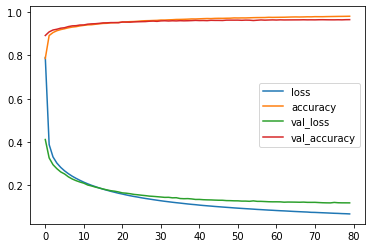

In [13]:
logs = pd.DataFrame(history.history)
logs.plot()

#### Prediction and Error Metrics

In [14]:
model.evaluate(test_x, test_y)

313/313 [==============================] - 0s 1ms/step - loss: 0.1176 - accuracy: 0.9643


[0.11760605126619339, 0.9642999768257141]

In [15]:
y_pred_prob = model.predict(test_x)

In [16]:
y_pred_prob.round(2)

array([[0.  , 0.  , 0.  , ..., 1.  , 0.  , 0.  ],
       [0.  , 0.  , 1.  , ..., 0.  , 0.  , 0.  ],
       [0.  , 0.99, 0.  , ..., 0.  , 0.  , 0.  ],
       ...,
       [0.  , 0.  , 0.  , ..., 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , ..., 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , ..., 0.  , 0.  , 0.  ]], dtype=float32)

#### Predicting and plotting the Results

In [17]:
y_pred = model.predict_classes(test_x)


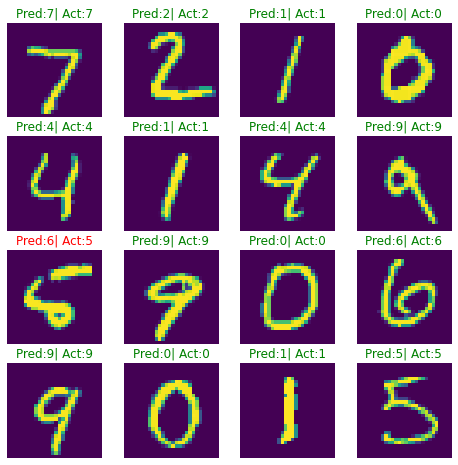

In [18]:
fig, axes = plt.subplots(4, 4, figsize= (8, 8))
for i, ax in enumerate(axes.flatten()):
    data_ =  test_x[i]
    color= 'g'
    ax.imshow(data_)
    if y_pred[i] != test_y[i]:
        color ='r'
    ax.set_title(f"Pred:{y_pred[i]}| Act:{test_y[i]}", color=color)
    ax.axis('off')

#### Confusion Matrix and classifiaction scores

In [19]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(test_y, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97       980
           1       0.98      0.99      0.99      1135
           2       0.96      0.96      0.96      1032
           3       0.95      0.96      0.96      1010
           4       0.97      0.96      0.97       982
           5       0.96      0.96      0.96       892
           6       0.96      0.97      0.97       958
           7       0.96      0.97      0.97      1028
           8       0.96      0.94      0.95       974
           9       0.96      0.95      0.95      1009

    accuracy                           0.96     10000
   macro avg       0.96      0.96      0.96     10000
weighted avg       0.96      0.96      0.96     10000



<AxesSubplot:>

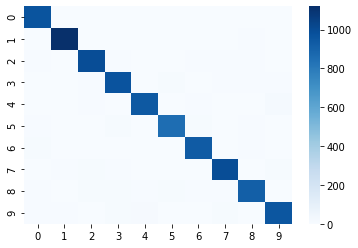

In [20]:
sn.heatmap(confusion_matrix(test_y, y_pred), cmap='Blues')